In [4]:
import ble
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

interface = ble.ble_environment('ridge_game.blend')
interface.start_game()
interface.start_UDP()

interface.getMinimalActionSet()
    
print "legal action set :", interface.legal_action_set
height, width = interface.getScreenDims()

for episode in range(0,10,1):
    reward = 0
    go = 0
    
    interface.reset_game()
    
    while not go:
    
        a = interface.legal_action_set[np.random.randint(len(interface.legal_action_set))]

        interface.act(a)
        interface.iterate()
        
        img = interface.getScreenGrayscale()
        
        #print interface.image.shape
        go = interface.get_game_over()    
        
        interface.get_reward()
        
        reward+=interface.reward

        if go:
            print "game over, total reward is ", reward
            time.sleep(0.01)
            
interface.test_send("off")
del interface
    

starting
UDP started
legal action set : ['forward', 'backward', 'left', 'right']
game over, total reward is  3
game over, total reward is  1
game over, total reward is  1
game over, total reward is  0
game over, total reward is  1
game over, total reward is  0
game over, total reward is  2
game over, total reward is  1
game over, total reward is  2
game over, total reward is  2
stopping


In [24]:
import os, subprocess, time, signal
import gym
from gym import error, spaces
from gym import utils
from gym.utils import seeding
import numpy as np

try:
    import ble
except ImportError as e:
    raise error.DependencyNotInstalled("{}. (HINT: you can install ble dependencies with 'pip install gym[ble].)'".format(e))

    
import logging
logger = logging.getLogger(__name__)



class BleEnv(gym.Env, utils.EzPickle):
    metadata = {'render.modes': ['human']}

    def __init__(self, game_path='ridge_game.blend'):
        self.viewer = None
        self.server_process = None
        self.game_path = game_path
        self.env = ble.ble_environment(game_path)
        
        self.env.start_game()
        self.env.start_UDP()
        self.env.getMinimalActionSet()
        # initialize with random action
        action = self.env.legal_action_set[np.random.randint(len(self.env.legal_action_set))]
        self.env.act(action)
        self.env.iterate()
        self.observation_space = spaces.Box(low=-1, high=1,
                                            shape=(self.env.getScreenDims()))
        
        self.action_space = spaces.Tuple((spaces.Discrete(len(self.env.legal_action_set))))
        
    def __del__(self):
        self.env.test_send("off")
        self.env.iterate()
        self.env.iterate()
        del self.env
        if self.viewer is not None:
            os.kill(self.viewer.pid, signal.SIGKILL)

    def _step(self, action):
        for i in range(4):
            self.env.act(action)
            self.status = self.env.iterate()
        reward = self.env.get_reward()
        ob = self.env.getScreenGrayscale()
        episode_over = self.env.get_game_over()
        return ob, reward, episode_over, {}
    
    def _reset(self):
        self.env.reset_game()
        action = self.env.legal_action_set[np.random.randint(len(self.env.legal_action_set))]
        self.env.act(action)
        self.env.iterate()
        ob = self.env.getScreenGrayscale()
        return ob
    
    
    def _render(self, mode='human', close=False):
        """ ble environement can only run in human mode currently, and 
        game is rendered directly in blender (blender game engine cannot run in )"""
        pass


In [25]:
BleEnv = BleEnv()

ob, reward, episode_over, _ = BleEnv._step(BleEnv.env.legal_action_set[np.random.randint(len(BleEnv.env.legal_action_set))])

BleEnv._reset()

del BleEnv

starting
UDP started
stopping


In [23]:
print(episode_over)

0


In [21]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

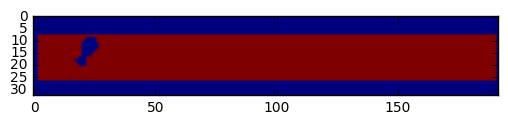

In [22]:
plt.imshow(ob)
plt.show()


In [4]:
a[1]

2